#  逻辑回归  logistic regression

逻辑回归解决二分类问题；将样本特征和样本发生概率联系起来，概率是一个数字；
- logistic 函数：
$$ g(z) = \frac{1}{1+e^{-z}} $$
- logistic 函数导数：
$$ g'(z) = g(z)(1-g(z))  $$

In [2]:
from pylab import *

In [14]:
x = np.linspace(-10,10,500)
y = 1/(1+np.exp(-x))

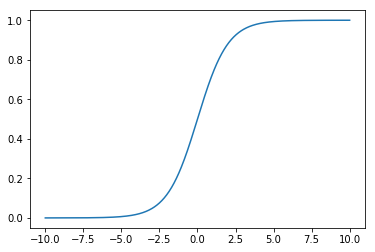

In [17]:
plt.plot(x,y)
plt.show()

逻辑回归的损失函数可以写为：
$$
cost=
\begin{cases}
-log(\hat{p}),   & \text { if y=1 } \\
-log(1-\hat{p}), & \text { if y=0 }
\end{cases}
$$  


因为该函数y的取值，最终公式可以化简为：
$$  cost=-ylog(\hat{p})-(1-y)log(1-\hat{p})  $$

如果有m个样本，则总的损失函数：
$$
J(\theta)=-\frac{1}{m}\sum_{i=1}^my^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})
$$
$$
\hat{p}^{(i)}=\sigma(X_b^{(i)}\theta)=\frac{1}{1+e^{-X_b^{(i)}\theta}}
$$


In [67]:
from sklearn import datasets
iris = datasets.load_iris()

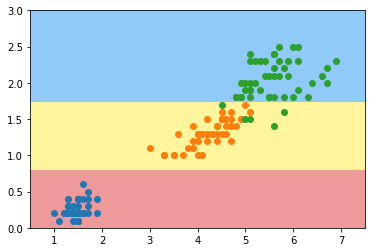

In [68]:
# %load ../pltboundary.py
"""
Created on Wed Jun 13 17:21:17 2018

@author: xhj
"""
from pylab import *
from sklearn import datasets

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
            np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
            np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
            )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap([ '#EF9A9A', '#FFF59D', '#90CAF9' ])
    plt.contourf(x0, x1, zz, linewidth=5, cmap = custom_cmap)
         
if __name__ == '__main__':
    iris = datasets.load_iris()
    X = iris.data[:, 2:]
    y = iris.target
    from sklearn.tree import DecisionTreeClassifier

    dt_clf = DecisionTreeClassifier(max_depth=2, criterion = "entropy")
    dt_clf.fit(X,y)
    plot_decision_boundary(dt_clf, axis= [0.5, 7.5, 0,3])

    plt.scatter(X[y==0,0], X[y==0,1])
    plt.scatter(X[y==1,0], X[y==1,1])
    plt.scatter(X[y==2,0], X[y==2,1])
    plt.show()
                                  

In [69]:
X = iris.data
y = iris.target

In [70]:
X = X[y<2, :2]
y = y[y<2]

In [71]:
X.shape

(100, 2)

In [72]:
y.shape

(100,)

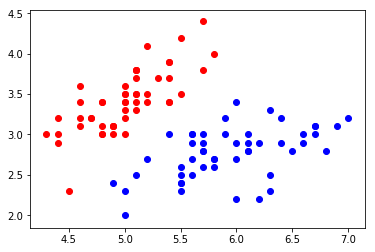

In [73]:
plt.scatter(X[y==0, 0],X[y==0,1], color='red')
plt.scatter(X[y==1, 0],X[y==1,1], color='blue')
plt.show()


In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [75]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg.score(x_test, y_test)

1.0

In [76]:
print(log_reg.coef_, log_reg.intercept_)


[[ 1.9662429 -3.2789523]] [-0.53750201]


In [77]:
def f(x):
    return (-log_reg.coef_[0][0]*x -log_reg.intercept_)/log_reg.coef_[0][1]

In [78]:
x1 = np.linspace(4,8,100)
x2 = f(x1)

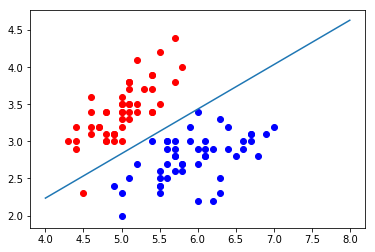

In [79]:
plt.scatter(X[y==0, 0],X[y==0,1], color='red')
plt.scatter(X[y==1, 0],X[y==1,1], color='blue')
plt.plot(x1,x2)
plt.show()

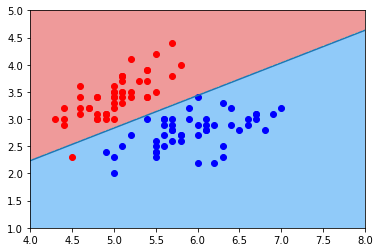

In [80]:
plot_decision_boundary(log_reg, axis=[4,8,1,5])
plt.scatter(X[y==0, 0],X[y==0,1], color='red')
plt.scatter(X[y==1, 0],X[y==1,1], color='blue')
plt.plot(x1,x2)
plt.show()